In [34]:
from pixell import enmap, curvedsky
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
import importlib
import pandas as pd
import tools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [60]:
# map source
map_source = 'websky'
# use maps provided by websky
map_path ='./maps/' + map_source +'/'
# path of output data
data_path = 'data/' + map_source + '/'
# path of output plots
plot_path = 'plots/'+ map_source + '/'

In [61]:
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1

In [64]:
# Read in reionization ksz and late-time ksz
ksz_ri = pd.read_csv(map_path + 'ksz_ri_cl.csv')
ksz_lt = pd.read_csv(map_path + 'ksz_lt_cl.csv')
lensed = pd.read_csv(map_path + 'lensed_cmb_cl.csv')
kap = pd.read_csv(map_path + 'kappa_cl.csv')
bin_width = 20
bin_ellmin, bin_ellmax = 10, 6100

bin_ri_ells = ksz_ri['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_ri_cl = ksz_ri['Cl'].values[bin_ellmin:bin_ellmax+1]

ells = ksz_lt['ell'].values[bin_ellmin:bin_ellmax+1]
ksz_lt_cl = ksz_lt['Cl'].values[bin_ellmin:bin_ellmax+1]

ells = lensed['ell'].values[bin_ellmin:bin_ellmax+1]
lensed_cl = lensed['Cl'].values[bin_ellmin:bin_ellmax+1]

ells = kap['ell'].values[bin_ellmin:bin_ellmax+1]
kap_cl = kap['Cl'].values[bin_ellmin:bin_ellmax+1]

In [66]:
importlib.reload(tools)
# smooth cls range and width
smooth_ellmin, smooth_ellmax = 20, 6000
smooth_width = 1
# smooth ksz_ri_cl and ksz_lt_cl
S_ri = tools.bin_smooth(ells, ksz_ri_cl, bin_width)
S_lt = tools.bin_smooth(ells, ksz_lt_cl, bin_width)
S_lensed = tools.bin_smooth(ells, lensed_cl, bin_width)
S_kap = tools.bin_smooth(ells, kap_cl, bin_width)

smooth_ells, smooth_ksz_ri_cl = S_ri.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_ksz_lt_cl = S_lt.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_lensed_cl = S_lensed.smooth(smooth_ellmin, smooth_ellmax, smooth_width)
smooth_ells, smooth_kap_cl = S_kap.smooth(smooth_ellmin, smooth_ellmax, smooth_width)

<module 'tools' from '/global/cscratch1/sd/hongbo/new_reion-lens/tools.py'>

Text(0.5, 0.98, 'websky power spectra')

Text(0.5, 1.0, 'before smooth, ellmin=10 ellmax=6100')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'after smooth, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

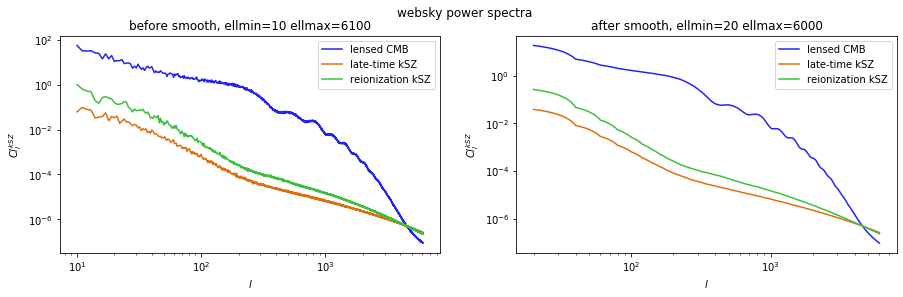

In [71]:
fig, ax = plt.subplots(1,2,figsize=(15,4))

fig.suptitle('websky power spectra')
ax[0].plot(ells, lensed_cl)
#ax[0].plot(ells, kap_cl)
ax[0].plot(ells, ksz_lt_cl)
ax[0].plot(ells, ksz_ri_cl)
ax[0].set_title(f'before smooth, ellmin={bin_ellmin} ellmax={bin_ellmax}')
ax[0].legend(['lensed CMB','late-time kSZ','reionization kSZ'])
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_xlabel('$l$')                                                                        
ax[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax[1].plot(smooth_ells, smooth_lensed_cl)
ax[1].plot(smooth_ells, smooth_ksz_lt_cl)
ax[1].plot(smooth_ells, smooth_ksz_ri_cl)
ax[1].set_title(f'after smooth, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax[1].legend(['lensed CMB','late-time kSZ','reionization kSZ'])
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlabel('$l$')                                                                        
ax[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path + 'ps.png')

In [72]:
smooth_ksz_lt_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_lt_cl])
smooth_lensed_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_lensed_cl])
ksz_ri_cl = np.concatenate([np.zeros(smooth_ellmin), smooth_ksz_ri_cl])
smooth_ells = np.concatenate([np.zeros(smooth_ellmin), smooth_ells])
num = 10
ksz_lt_g_alm = hp.synalm(smooth_ksz_lt_cl) 
ksz_ri_g_alm = hp.synalm(ksz_ri_cl)
ksz_lt_g_cl = hp.alm2cl(ksz_lt_g_alm)
ksz_ri_g_cl = hp.alm2cl(ksz_ri_g_alm)

/global/homes/h/hongbo/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/healpy/sphtfunc.py:400: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Text(0.5, 1.0, 'ksz_cl, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

Text(0.5, 1.0, 'ksz_cl Gaussian realization, ellmin=20 ellmax=6000')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

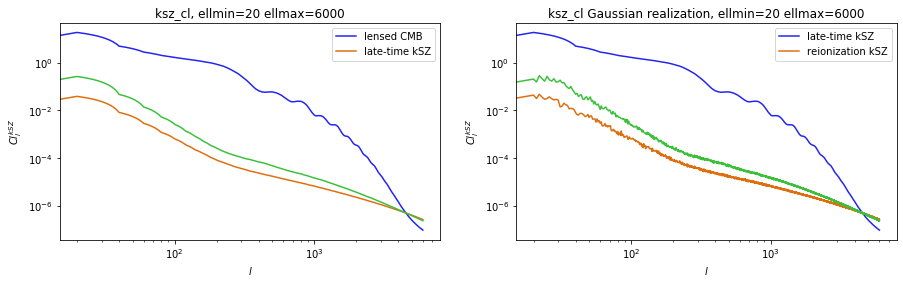

In [73]:
fig1, ax1 = plt.subplots(1,2,figsize=(15,4))

ax1[0].plot(smooth_ells, smooth_lensed_cl)
ax1[0].plot(smooth_ells, smooth_ksz_lt_cl)
ax1[0].plot(smooth_ells, ksz_ri_cl)
ax1[0].set_title(f'ksz_cl, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[0].legend(['lensed CMB','late-time kSZ'])
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[0].set_xlabel('$l$')                                                                        
ax1[0].set_ylabel('$Cl_{l}^{kSZ}$')      

ax1[1].plot(smooth_ells, smooth_lensed_cl)
ax1[1].plot(smooth_ells, ksz_lt_g_cl)
ax1[1].plot(smooth_ells, ksz_ri_g_cl)
ax1[1].set_title(f'ksz_cl Gaussian realization, ellmin={smooth_ellmin} ellmax={smooth_ellmax}')
ax1[1].legend(['lensed CMB','late-time kSZ'])
ax1[1].legend(['late-time kSZ','reionization kSZ'])
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')
ax1[1].set_xlabel('$l$')                                                                        
ax1[1].set_ylabel('$Cl_{l}^{kSZ}$')      

plt.savefig(plot_path+'realizations_ksz_cl.png')

Text(0.5, 1.0, '$Cl_{l}^{kSZ}$')

Text(0.5, 0, '$l$')

Text(0, 0.5, '$Cl_{l}^{kSZ}$')

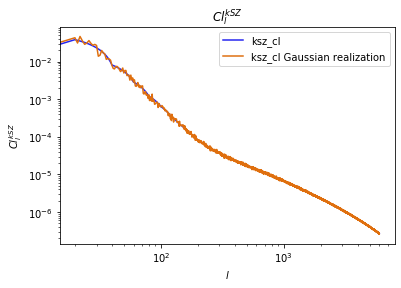

In [74]:
# check one realization ksz_cl_g and  ksz_cl
plt.loglog(smooth_ells, smooth_ksz_lt_cl)
plt.loglog(smooth_ells, ksz_lt_g_cl)
plt.legend([ 'ksz_cl', 'ksz_cl Gaussian realization'])
plt.title('$Cl_{l}^{kSZ}$')
plt.xlabel('$l$')
plt.ylabel('$Cl_{l}^{kSZ}$')
plt.savefig(plot_path+'realization_comparision.png')

In [75]:
# Write ksz_g_alm on disk
hp.write_alm(map_path+f'ksz_lt_g_alm_{smooth_ellmax}.fits', ksz_lt_g_alm, overwrite=True)
hp.write_alm(map_path+f'ksz_ri_g_alm_{smooth_ellmax}.fits', ksz_ri_g_alm, overwrite=True)